# Чтение данных

Импорт необходимых библиотек

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score


import tensorflow as tf
tf.set_random_seed(1)


# Беглый взгляд на данные

In [2]:
df_train = pd.read_csv('train_sample.csv')
df_test = pd.read_csv('test_sample.csv')

print(df_train.columns)
df_train.head()

Index(['system:index', 'NDSI', 'NDVI', 'NDWI', 'RND', 'blue', 'currentDate',
       'date', 'dayNumber', 'green', 'name', 'nir', 'randomDayNum',
       'realmed_NDSI', 'realmed_NDVI', 'realmed_NDWI', 'realmed_blue',
       'realmed_green', 'realmed_nir', 'realmed_red', 'realmed_swir1',
       'realmed_swir2', 'red', 'swir1', 'swir2', 'tmpDayRND', 'tmpYearRND',
       'tree_canopy_cover', 'uncertainty', '.geo'],
      dtype='object')


system:index      NDSI      NDVI  \
0  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843_0 -0.152049  0.018710   
1  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843_1 -0.295080  0.046823   
2  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843_2 -0.297743  0.042378   
3  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843_3 -0.504727  0.061179   
4  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843_4 -0.271140  0.035784   

       NDWI       RND      blue  currentDate     date  dayNumber     green  \
0 -0.169087  0.656874  0.088358      17187.0  17187.0   0.010959  0.085645   
1 -0.337210  0.656874  0.184605      17187.0  17187.0   0.010959  0.181538   
2 -0.336263  0.656874  0.181008      17187.0  17187.0   0.010959  0.177370   
3 -0.558808  0.656874  0.275681      17187.0  17187.0   0.010959  0.264960   
4 -0.302466  0.656874  0.160235      17187.0  17187.0   0.010959  0.157851   

   ...  realmed_swir1  realmed_swir2       red     swir1     swir2  tmpDayRND  \
0  ...         0.0881        0.06305  0.086905  0.029867  0.023039   0.707693   
1  ...         0.0906        0.06570  0.185905  0.068878  0.053814   0.707693   
2  ...         0.1008        0.06570  0.180800  0.066170  0.053084   0.707693   
3  ...         0.0881        0.06045  0.270807  0.088384  0.065806   0.707693   
4  ...         0.0931        0.07370  0.161879  0.056902  0.044521   0.707693   

   tmpYearRND  tree_canopy_cover  uncertainty  .geo  
0    0.624448               0.60     0.176675   NaN  
1    0.624448               0.49     0.176675   NaN  
2    0.624448               0.54     0.178466   NaN  
3    0.624448               0.63     0.172988   NaN  
4    0.624448               0.64     0.172988   NaN  

[5 rows x 30 columns]

In [3]:
band_names = ['swir2','swir1','nir','red','green','blue', 'NDVI', 'NDSI', 'NDWI']
real_band_names = ['realmed_'+n for n in band_names]

names = ['system:index', 'name', 'date', 'dayNumber', 'tree_canopy_cover'] + band_names + real_band_names
print(names)

df_train = df_train[names]
df_test = df_test[names]
df_test.head()

['system:index', 'name', 'date', 'dayNumber', 'tree_canopy_cover', 'swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI']


system:index    name     date  \
0  1_0000e5da29c0b1fa60c2_1_0000e5da29c0b1fa60c2_0  Change  17187.0   
1  1_0000e5da29c0b1fa60c2_1_0000e5da29c0b1fa60c2_1  Change  17187.0   
2  1_0000e5da29c0b1fa60c2_1_0000e5da29c0b1fa60c2_2  Change  17187.0   
3  1_0000e5da29c0b1fa60c2_1_0000e5da29c0b1fa60c2_3  Change  17187.0   
4  1_0000e5da29c0b1fa60c2_1_0000e5da29c0b1fa60c2_4  Change  17187.0   

   dayNumber  tree_canopy_cover     swir2     swir1       nir       red  \
0   0.010959               0.62  0.039750  0.048417  0.153436  0.125828   
1   0.010959               0.60  0.072407  0.088061  0.259202  0.225425   
2   0.010959               0.68  0.071147  0.088173  0.272314  0.237362   
3   0.010959               0.64  0.051526  0.063390  0.194974  0.168836   
4   0.010959               0.64  0.039492  0.052696  0.156909  0.120585   

      green      ...           NDWI  realmed_swir2  realmed_swir1  \
0  0.129770      ...      -0.338307         0.0420         0.0603   
1  0.221423      ...      -0.480073         0.0896         0.0957   
2  0.235041      ...      -0.528717         0.0791         0.1007   
3  0.169774      ...      -0.383166         0.0737         0.0805   
4  0.122793      ...      -0.320863         0.0579         0.0855   

   realmed_nir  realmed_red  realmed_green  realmed_blue  realmed_NDVI  \
0       0.2673       0.2344         0.2369        0.2579      0.065577   
1       0.3952       0.3487         0.3218        0.3073      0.062508   
2       0.4005       0.3487         0.3407        0.3437      0.069140   
3       0.4377       0.4256         0.4104        0.4118      0.014016   
4       0.3420       0.2835         0.2606        0.2661      0.093525   

   realmed_NDSI  realmed_NDWI  
0     -0.590770     -0.631868  
1     -0.569307     -0.610104  
2     -0.551847     -0.598164  
3     -0.681881     -0.689309  
4     -0.536585     -0.600000  

[5 rows x 23 columns]

In [4]:
changes = df_train.loc[df_train['date'] > 0 ]
no_changes = df_train.loc[df_train['date'] == -1]

print(df_train.shape)
print(changes.shape)
print(no_changes.shape)


print()
changes1 = df_test.loc[df_test['date'] > 0 ]
no_changes1 = df_test.loc[df_test['date'] == -1]

print(df_test.shape)
print(changes1.shape)
print(no_changes1.shape)


(27143, 23)
(5096, 23)
(22047, 23)

(13712, 23)
(3089, 23)
(10623, 23)


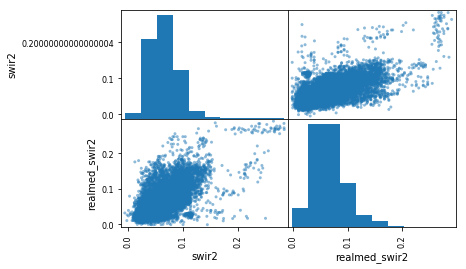

In [5]:
_ = pd.plotting.scatter_matrix(no_changes[['swir2', 'realmed_swir2']], marker='.')

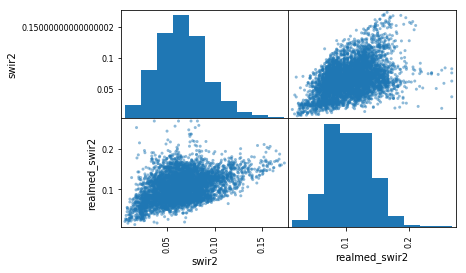

In [6]:
_ = pd.plotting.scatter_matrix(changes[['swir2', 'realmed_swir2']], marker='.')

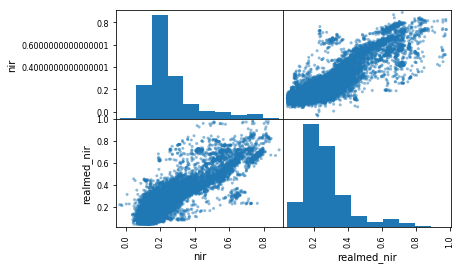

In [7]:
_ = pd.plotting.scatter_matrix(no_changes[['nir', 'realmed_nir']], marker='.')

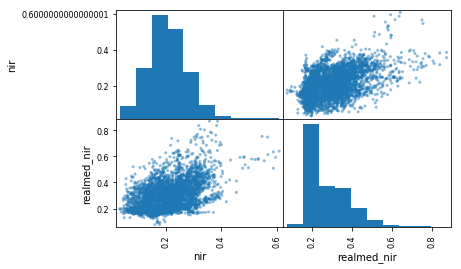

In [8]:
_ = pd.plotting.scatter_matrix(changes[['nir', 'realmed_nir']], marker='.')

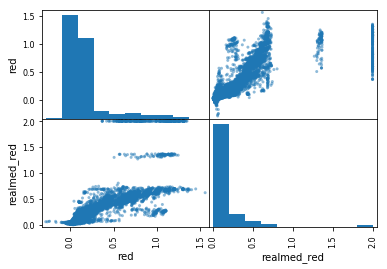

In [9]:
_ = pd.plotting.scatter_matrix(no_changes[['red', 'realmed_red']], marker='.')

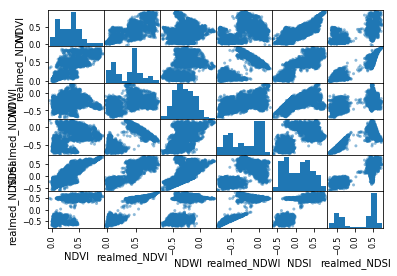

In [10]:
_ = pd.plotting.scatter_matrix(changes[['NDVI', 'realmed_NDVI', 'NDWI', 'realmed_NDWI', 'NDSI', 'realmed_NDSI']], marker='.')

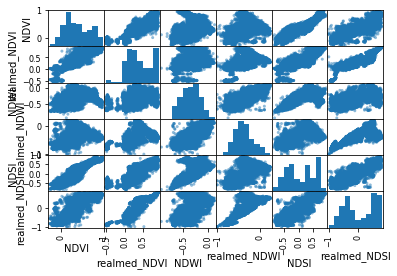

In [11]:
_ = pd.plotting.scatter_matrix(no_changes[['NDVI', 'realmed_NDVI', 'NDWI', 'realmed_NDWI', 'NDSI', 'realmed_NDSI']], marker='.')

# Предобработка обучающего и тестового множеств

In [12]:
# Все завязано на конкретный формат файла. При необходимости - менять функцию
def prepare_data(data):
    # ['system:index', 'name', 'date', 'tree_canopy_cover', 'swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI']

    
    bands = [
        'swir2', 'swir1', 'nir', 'red', 'green', 'blue',
        'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue'
    ]
    
    indices = [
        'NDVI', 'NDSI', 'NDWI', 
        'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI'
    ]
    
    inputs = bands + indices
    
        
    # В system:index содержится ID полигона (у нас много точек на полигон), чтобы избежать оптимистичной оценки из-за автокорреляции
    # выделим номер полигона и сохраним
    data['system:index'] = data['system:index'].str.extract(r'(.+)_\d+$')
    
    data['change'] = (data['name'] == 'Change').astype(int)

    
    addons = ['system:index', 'dayNumber', 'tree_canopy_cover', 'change']
    # addons = ['system:index', 'change']
        
    # names = set(inputs) - set(['name'])
    names = inputs + addons
    print(names)
    return data[names]
  



In [13]:
train_data = prepare_data(df_train.copy())
test_data = prepare_data(df_test.copy())

train_data.head()

['swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI', 'system:index', 'dayNumber', 'tree_canopy_cover', 'change']
['swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI', 'system:index', 'dayNumber', 'tree_canopy_cover', 'change']


swir2     swir1       nir       red     green      blue  realmed_swir2  \
0  0.023039  0.029867  0.096445  0.086905  0.085645  0.088358        0.06305   
1  0.053814  0.068878  0.212503  0.185905  0.181538  0.184605        0.06570   
2  0.053084  0.066170  0.203902  0.180800  0.177370  0.181008        0.06570   
3  0.065806  0.088384  0.301704  0.270807  0.264960  0.275681        0.06045   
4  0.044521  0.056902  0.181860  0.161879  0.157851  0.160235        0.07370   

   realmed_swir1  realmed_nir  realmed_red   ...        NDVI      NDSI  \
0         0.0881       0.3288      0.29095   ...    0.018710 -0.152049   
1         0.0906       0.3527      0.31330   ...    0.046823 -0.295080   
2         0.1008       0.3208      0.30100   ...    0.042378 -0.297743   
3         0.0881       0.3288      0.29500   ...    0.061179 -0.504727   
4         0.0931       0.3501      0.31325   ...    0.035784 -0.271140   

       NDWI  realmed_NDVI  realmed_NDSI  realmed_NDWI  \
0 -0.169087      0.061056     -0.535234     -0.577351   
1 -0.337210      0.059104     -0.551646     -0.591551   
2 -0.336263      0.031915     -0.499831     -0.523802   
3 -0.558808      0.054104     -0.540148     -0.577391   
4 -0.302466      0.055660     -0.541820     -0.579954   

                                    system:index  dayNumber tree_canopy_cover  \
0  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843   0.010959              0.60   
1  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843   0.010959              0.49   
2  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843   0.010959              0.54   
3  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843   0.010959              0.63   
4  1_0000c78eaa3e8f0eb843_1_0000c78eaa3e8f0eb843   0.010959              0.64   

   change  
0       1  
1       1  
2       1  
3       1  
4       1  

[5 rows x 22 columns]

In [14]:
def split_data(data, train_val_test=0.66, group='system:index'):
  np.random.seed(1)
  ids = set(data[group])
  count = len(ids)
  print('Found %s unique areas' % (count))

  train_count = int(count * train_val_test)
  
  train = np.random.choice(list(ids), train_count, False)

  val_ids = ids.difference(set(train))
  val = np.array(list(val_ids))
  
  train = data[data[group].isin(train)]
  val = data[data[group].isin(val)]
  
  train = np.array(train.drop(labels=[group], axis=1))
  val = np.array(val.drop(labels=[group], axis=1))

  return train, val
  

# Обучение модели

In [15]:
def get_batch(data, size, input_count):
    batch = data[np.random.randint(data.shape[0], size=size), :]

    # add a little of noise
    errors = np.random.uniform(low=-0.0001, high=0.0001, size=(size, input_count))
    x = batch[:, :input_count]
    x += + errors
    

    y = batch[:, input_count:]
    
    return x, y
 

In [16]:
def print_model(x_test, y_test):
    model_dir = '.'
    result_filename_prefix = 'res_'
    
    """   
    inference_graph = tf.Graph()
    with tf.Session(graph=inference_graph) as sess:
        loader = tf.train.import_meta_graph(os.path.join(model_dir, model_name+".meta"))
        loader.restore(sess, os.path.join(model_dir, model_name))

        # x = tf.placeholder(tf.float32, [None, input_count])
        # y_ = tf.placeholder(tf.int32, [None, out_count])

        _loss = inference_graph.get_tensor_by_name('loss:0')
        _loss1 = inference_graph.get_tensor_by_name('loss1:0')
        _x = inference_graph.get_tensor_by_name('input:0')
        _y = inference_graph.get_tensor_by_name('target:0')

        _W1 = inference_graph.get_tensor_by_name('weights/w1:0')
        _W2 = inference_graph.get_tensor_by_name('weights/w2:0')
        _W3 = inference_graph.get_tensor_by_name('weights/w3:0')

        _b1 = inference_graph.get_tensor_by_name('biases/b1:0')
        _b2 = inference_graph.get_tensor_by_name('biases/b2:0')
        _b3 = inference_graph.get_tensor_by_name('biases/b3:0')



        print('test ACC:\t', sess.run(_loss, feed_dict={_x: x_test,_y: y_test}))
        print('test ACC1:\t', sess.run(_loss1, feed_dict={_x: x_test,_y: y_test}))
    """
    
    print('test ACC:\t', sess.run(loss, feed_dict={x: x_test, y_: y_test}))
    print('test ACC1:\t', sess.run(loss1, feed_dict={x: x_test, y_: y_test}))

    bestW1, bestW2, bestW3, bestB1, bestB2, bestB3 = sess.run([W1, W2, W3, b1, b2, b3])

    os.makedirs(model_dir, exist_ok=True)
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w1.txt'), bestW1, delimiter=', ', newline='],\n[', header='[\n', footer='', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b1.txt'), bestB1, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')

    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w2.txt'), bestW2, delimiter=', ', newline='],\n[', header='[\n[', footer=']', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b2.txt'), bestB2, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')

    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w3.txt'), bestW3, delimiter=', ', newline='],\n[', header='[\n[', footer=']', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b3.txt'), bestB3, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')




In [17]:
def model(x, W1, W2, W3, b1, b2, b3):
    # tf.summary.histogram('w3', W3)
    # tf.summary.histogram('b3', b3)

    l1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    # tf.summary.histogram('l1', l1)

    l2 = tf.nn.relu(tf.matmul(l1, W2) + b2)
    # tf.summary.histogram('l2', l2)

    l3_logits = tf.matmul(l2, W3) + b3
    # tf.summary.histogram('l3_logits', l3_logits)

    return l3_logits

In [18]:
test = np.array(test_data.drop(labels=['system:index'], axis=1))
test = np.float32(test)


train, val = split_data(train_data.copy())

Found 500 unique areas


In [22]:
layer1 = 10
layer2 = 5

summaries_dir = '.'
model_dir = '.'
max_epoch = 10000


out_count = 1
input_count = train.shape[1] - out_count


x = tf.placeholder(tf.float32, [None, input_count], name='input')

with tf.name_scope('weights'):
    W1 = tf.Variable(tf.truncated_normal([input_count, layer1], stddev=0.5), name='w1')
    W2 = tf.Variable(tf.truncated_normal([layer1, layer2], stddev=0.5), name='w2')
    W3 = tf.Variable(tf.truncated_normal([layer2, out_count], stddev=0.5), name='w3')

with tf.name_scope('biases'):
    b1 = tf.Variable(tf.zeros([layer1]), name='b1')
    b2 = tf.Variable(tf.zeros([layer2]), name='b2')
    b3 = tf.Variable(tf.zeros([out_count]), name='b3')

logits = model(x, W1, W2, W3, b1, b2, b3)
y = tf.sigmoid(logits, name='result')


# Define loss and optimizer
y_ = tf.placeholder(tf.int32, [None, out_count], name='target')

loss1 = tf.reduce_mean(
    tf.losses.absolute_difference(labels=y_, predictions=y), name='loss1')
# tf.summary.scalar('abs_diff', loss1)

reg_w = 0.0001
loss = tf.reduce_mean(
    # tf.losses.sparse_softmax_cross_entropy(labels=[y_], logits=[tf.transpose([-logits, logits])]) +
    loss1 + reg_w*(tf.nn.l2_loss(W1)+tf.nn.l2_loss(W2)+tf.nn.l2_loss(W3)),
    name='loss'
)


# tf.summary.scalar('Regularized loss', loss)

optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
optimizer = optimizer.minimize(loss)

saver = tf.train.Saver(max_to_keep=1)


sess = tf.InteractiveSession()

# merged = tf.summary.merge_all()
# train_writer = tf.summary.FileWriter(summaries_dir + '/train', sess.graph)
# test_writer = tf.summary.FileWriter(summaries_dir + '/test')

tf.global_variables_initializer().run()
# Train
best_loss = 9999999999999
for epoch in range(max_epoch):
    batch_xs, batch_ys = get_batch(train, 2**10, input_count)
    
    # print(batch_xs.dtype, batch_xs.shape)
    _, train_loss, train_loss1 = sess.run(
        [optimizer, loss, loss1], feed_dict={x: batch_xs, y_: batch_ys}
    )
    # train_writer.add_summary(summary, epoch)

    # Test trained model
    if epoch % 100 == 99:
        val_loss = sess.run(loss, feed_dict={x: val[:, :input_count], y_: val[:, input_count:]})
        print('EPOCH', epoch+1, '\tVal Loss =', val_loss, 'Loss1: \tval', sess.run(loss1, feed_dict={x: val[:, :input_count], y_: val[:, input_count:]}), '\ttrain', train_loss1)
        # test_writer.add_summary(summary, epoch)

        if val_loss < best_loss:
            best_loss = val_loss

            # saver.save(sess, os.path.join(model_dir, "model"))
          
print('Best val LOSS:', best_loss)
test_loss, test_loss1 = sess.run(
        [loss, loss1], feed_dict={x: test[:, :input_count], y_: test[:, input_count:]})

print('Test Loss1 =', test_loss1, 'Test Loss =', test_loss)

print_model(test[:, :input_count], test[:, input_count:])


y_pred_vec = sess.run(y, feed_dict={x: val[:, :input_count]})
y_pred_vec = (y_pred_vec>0.5).astype(int)
y_true_vec = val[:, input_count:]

conf_mat = confusion_matrix(y_true_vec, y_pred_vec)
print('ConfMatr Val')
print(pd.DataFrame(conf_mat))

print('VAL AUC:',roc_auc_score(y_true_vec, y_pred_vec))


y_pred_vec = sess.run(y, feed_dict={x: test[:, :input_count]})
y_pred_vec = (y_pred_vec>0.5).astype(int)
y_true_vec = test[:, input_count:]

conf_mat = confusion_matrix(y_true_vec, y_pred_vec)
print('ConfMatr Test')
print(pd.DataFrame(conf_mat))

print('Test AUC:', roc_auc_score(y_true_vec, y_pred_vec))




# Random Output for test GEE NNet:
tmp = 2*np.random.uniform(size=20) - 1
print(repr(tmp))

sess.run(y, feed_dict={x: tmp.reshape((-1, 20))})


EPOCH 100 	Val Loss = 0.152884 Loss1: 	val 0.15048496 	train 0.1876888
EPOCH 200 	Val Loss = 0.15210961 Loss1: 	val 0.14983103 	train 0.20378347
EPOCH 300 	Val Loss = 0.16752486 Loss1: 	val 0.16404581 	train 0.12736897
EPOCH 400 	Val Loss = 0.16581333 Loss1: 	val 0.16163458 	train 0.13866903
EPOCH 500 	Val Loss = 0.1597622 Loss1: 	val 0.15512933 	train 0.12357095
EPOCH 600 	Val Loss = 0.13993306 Loss1: 	val 0.13474296 	train 0.11378067
EPOCH 700 	Val Loss = 0.13895275 Loss1: 	val 0.13310206 	train 0.10233216
EPOCH 800 	Val Loss = 0.1360175 Loss1: 	val 0.12964197 	train 0.08787011
EPOCH 900 	Val Loss = 0.1339378 Loss1: 	val 0.12704489 	train 0.08824185
EPOCH 1000 	Val Loss = 0.12314644 Loss1: 	val 0.115781434 	train 0.09062529
EPOCH 1100 	Val Loss = 0.12977351 Loss1: 	val 0.12199942 	train 0.08555869
EPOCH 1200 	Val Loss = 0.13591212 Loss1: 	val 0.12772918 	train 0.0760347
EPOCH 1300 	Val Loss = 0.14485103 Loss1: 	val 0.1363061 	train 0.07113097
EPOCH 1400 	Val Loss = 0.1402518 Loss1: 	

array([[1.]], dtype=float32)

In [24]:
print('Test AUC:',roc_auc_score(y_true_vec, y_pred_vec))

Test AUC: 0.9028382986310877


In [32]:
tmp = 2*np.random.uniform(size=20) - 1
print(repr(tmp))

sess.run(y, feed_dict={x: tmp.reshape((-1, 20))})

array([-0.13116985,  0.13883833,  0.3768248 , -0.20202439, -0.5136471 ,
        0.83758798, -0.21264625,  0.61810237, -0.79714845, -0.54311671,
        0.82482757, -0.71544706,  0.66951833, -0.25670784,  0.58441641,
        0.50700682, -0.15991614,  0.3379014 , -0.79544951,  0.24533639])


array([[0.08061927]], dtype=float32)